# Exercício Python no notebook Google Colab

ATENÇÃO: Primeiro copie esse notebook para sua área, resolva-o e retorne o seu link no formulário, não esquecendo de compartilhar o seu notebook Colab com qualquer pessoa que tenha acesso ao link.

## Enunciado
Você receberá uma matriz (uma lista de listas) de, possivelmente, altura e largura diferentes contendo apenas `0`s e `1`s. Cada `0` representa terra e cada `1` representa água. Uma lagoa é composta por qualquer número de `1`s verticalmente ou horizontalmente adjacentes (mas não diagonalmente adjacentes). O número de `1`s adjacentes determina a área da lagoa.

Escreva uma função que retorna uma lista com as áreas das lagoas contidas na matriz em ordem crescente.

Um exemplo é:

Dada a matriz

```
matrix = [
    [1, 1, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1],
    [1, 0, 1, 1, 0]
]
```
A resposta esperada é uma lista com os tamanhos dos rios

```
sizes = [1, 2, 2, 3, 5]
```

Os critérios de avaliação são legibilidade do código e corretude do algoritmo, outros aspectos como performance e técnicas de programação não serão avaliados.

Você pode usar qualquer função built-in do python, pode utilizar funções auxiliares, criar classes e etc. Deve-se apenas manter a assinatura da função `lake_areas`. Na dúvida, submeter sua melhor tentativa documentando seu raciocínio é melhor do que não submeter nada :)

In [ ]:
from typing import List

def lake_areas(matrix: List[List[int]]) -> List[int]:
    """
    Calculates the size of all connected areas of water (lakes) in a matrix.

    Args:
        matrix (List[List[int]]): A matrix of 0s and 1s representing land and water.

    Returns:
        List[int]: A sorted list of integers representing the size of each area of water.

    """


    def water_localizer(matrix, visited, water):
        """
        Helper function that calculates the size of a single area of water.

        Args:
            matrix (List[List[int]]): A matrix of 0s and 1s representing land and water.
            visited (set): A set of visited coordinates.
            water (List[Tuple[int, int]]): A list of coordinates representing water.

        Returns:
            int: The size of the water area.
        """

        area = 0
        while water:
            x, y = water.pop(0)

            if (x, y) not in visited and matrix[x][y] == 1:
                visited.add((x, y))
                area += 1
                if x > 0:
                    water.append((x - 1, y))
                if y > 0:
                    water.append((x, y - 1))
                if x < len(matrix) - 1:
                    water.append((x + 1, y))
                if y < len(matrix[0]) - 1:
                    water.append((x, y + 1))
        return area


    
    visited = set() # Saving the coordinates of visited areas to save processing power
    lakes_area = []

    # A loop within a loop for search on each coordinate of the 2D array

    for i, _ in enumerate(matrix):
        for j, __ in enumerate(matrix[0]):
            if (i, j) not in visited and matrix[i][j] == 1:
                water = [(i, j)]
                area = water_localizer(matrix, visited, water)
                lakes_area.append(area)

    return sorted(lakes_area)


## Como a função funciona

A função acima recebe uma matriz/array 2D contendo 0 e 1, onde 1 representa água e 0 representa terra/nada.

O objetivo dela é detectar um local com água e percorrer os caminhos adjacentes para encontrar o maior número de lugares com água possível. A cada número 1 encontrado, a área com água, denominada de lago para este exercício, aumenta em 1.

Assim sendo, a função `lake_areas` recebe a matriz e começa a procurar por locais com água. Encontrando um local, ela irá acionar a função auxiliar `water_localizer` e adicionar as outras coordenadas adjacentes para procurar antes de procurar pela próxima água.

Assim, a função auxiliar fica em loop até que não encontre mais nenhuma área com água junta - lembrando que para ser considerado um lago a água encontrada deve encostar em outra água verticalmente ou horizontalmente, não sendo considerado as águas nas verticais.

Abaixo segue uma figura exemplificando o funcionamento da função e, após a imagem, há exemplos práticos chamando a função.

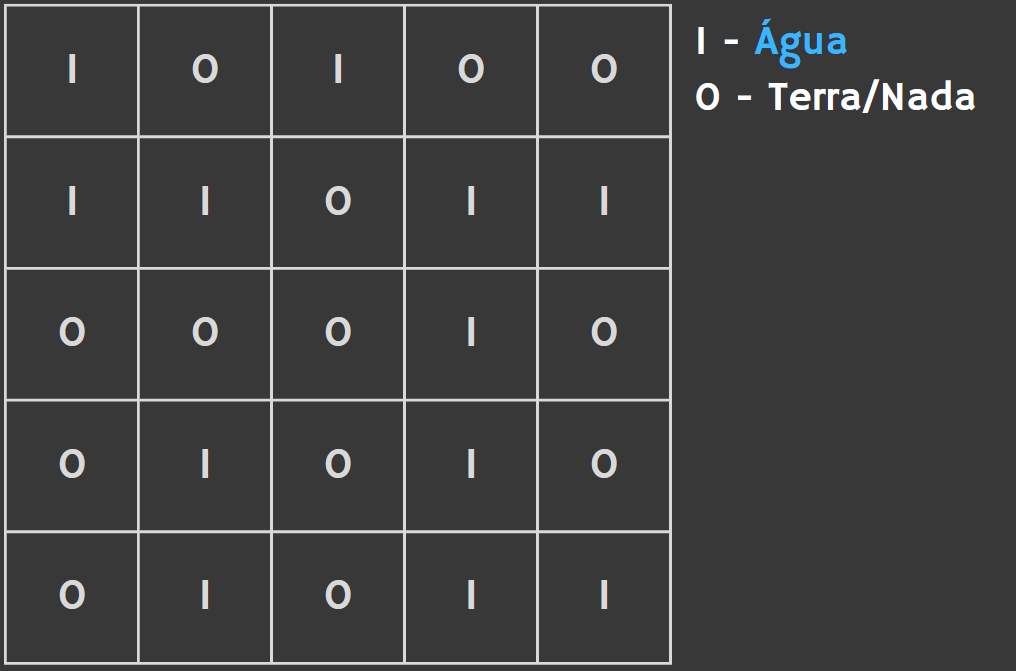

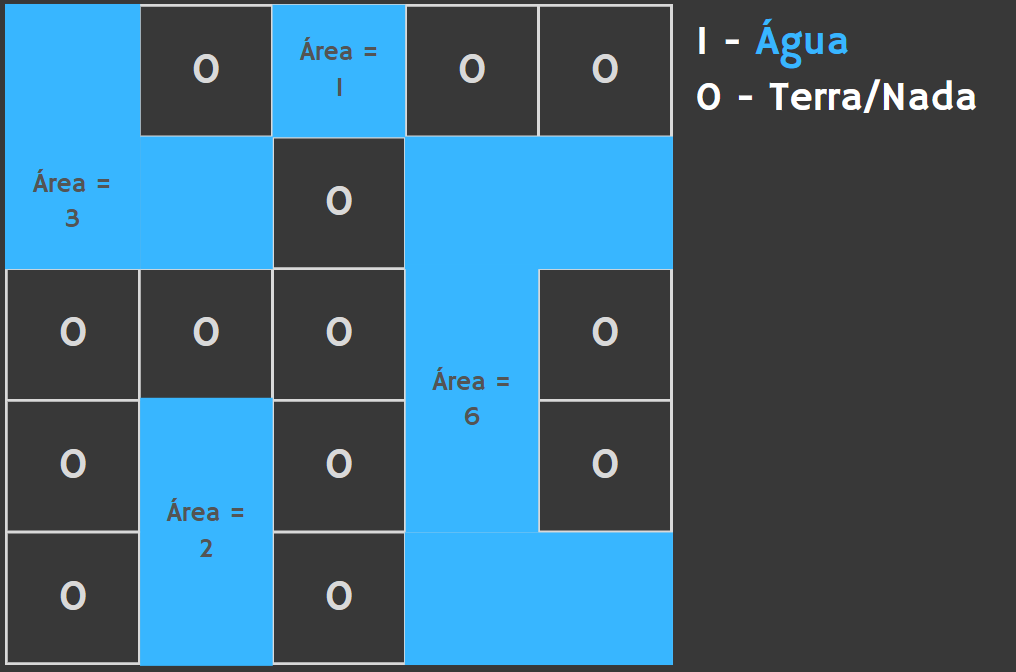

In [ ]:
lake_areas(matrix = [
    [1, 0, 1, 0, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 1]
])

[1, 2, 3, 6]

In [ ]:
lake_areas(matrix = [
    [1, 1, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [0, 0, 1, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 1, 1, 0]
])

[1, 2, 2, 3, 5]

In [ ]:
lake_areas(matrix = [
    [0, 0, 0, 1, 1, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 1, 1, 0, 1],
    [1, 1, 0, 0, 1, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
    [0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 0, 1],
    [0, 0, 1, 1, 1, 0, 0, 0, 1, 1],
    [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
    [1, 1, 0, 1, 1, 0, 0, 1, 0, 1]
])

[1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 6, 7, 15]